In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
imbook = cv2.imread('./book.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)
imbook.shape

(642, 489)

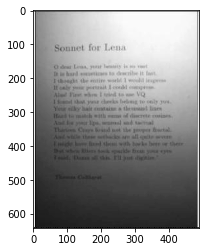

In [3]:
plt.imshow(imbook,cmap = "gray")

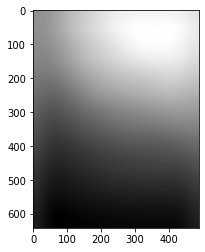

In [4]:
from scipy import ndimage as flt
fltbook = flt.gaussian_filter(imbook,sigma = 30)
plt.imshow(fltbook,cmap = "gray")

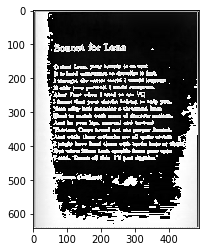

In [5]:
plt.imshow(imbook-fltbook, cmap='gray')

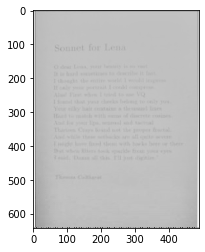

In [6]:

res = np.log10(imbook) - np.log10(fltbook)
# print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
# print(minres,maxres)
plt.imshow(res, cmap='gray')

# Task

Реализовать функцию flt.gaussian_filter только с использование numpy 


In [26]:
import math
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt

def convolve(img: np.array, filter: np.array):  
    img_rows=img.shape[0]
    img_col=img.shape[1]
   
    filtered_image = np.zeros_like(img)
    #rotate filter 90 degrees horizontally and vertically 
    filter=np.rot90(filter,2)

    #To gurantee odd filters
    if(((filter.shape[0])%2)==0 or ((filter.shape[1])%2)==0):
      #print('Error,filter dimensions should be odd !')
      raise Exception('Error,filter dimensions should be odd!')
    filter_rows=filter.shape[0]
    filter_cols=filter.shape[1]
    padded_img=np.zeros((img_rows+filter_rows-1,img_col+filter_cols-1))
    #padded_img rows R and columns C 
    padded_img_R=padded_img.shape[0]
    padded_img_C=padded_img.shape[1]
    padded_img[((filter_rows)//2):padded_img_R-((filter_rows)//2),((filter_cols)//2):padded_img_C-((filter_cols)//2)]=img
    for i in range(((filter_rows)//2),padded_img_R-((filter_rows)//2)):
        for j in range(((filter_cols)//2),padded_img_C-((filter_cols)//2)):
            template=padded_img[i-((filter_rows)//2):(i+((filter_rows)//2)+1),j-((filter_cols)//2):(j+((filter_cols)//2)+1)]
            result=template*filter
            # element-wise multiplication filter && image
            filtered_image[i-((filter_rows)//2),j-((filter_cols)//2)]=result.sum()
    
    name='filtered image'  
    print('filtered_image',filtered_image.shape)
    visualize_image(name,filtered_image)

    return filtered_image

In [31]:
import math
def my_gaussian_filter(ksize, sigma):
    width=math.sqrt(ksize)
    width=int(width)
    height=width
    g=np.zeros((width,height))
    
    points_x = np.arange((-1*width//2)+1,(width//2)+1)   
    points_y = np.arange((-1*width//2)+1,(width//2)+1)
            
    for x in range(((-1*width//2)+1),((width//2)+1)):
        for y in range(((-1*height//2)+1),((height//2)+1)):
            g[x+(width//2),y+(height//2)]=(1/(2*math.pi*sigma*sigma))*math.exp((-1*(x*x+y*y))/(2*sigma*sigma))
    print('x array =',points_x)   
    print('y array =',points_y)                    
    return g

In [32]:
import cv2
def visualize_image(figure_name: str, img: np.ndarray):
    plt.imshow(img, cmap='gray')

x array = [-2 -1  0  1  2]
y array = [-2 -1  0  1  2]
filtered_image (642, 489)


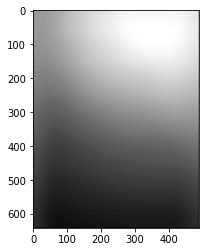

In [35]:
g_filter = my_gaussian_filter(25,3)
filtered_image = convolve(fltbook,g_filter)

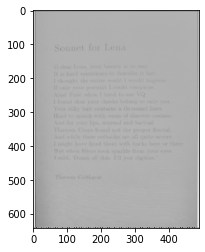

In [30]:
res = np.log10(imbook) - np.log10(filtered_image)
# print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
# print(minres,maxres)
plt.imshow(res, cmap='gray')